# 앙상블 분류기
- 여러 개의 개별 분류 모델을 결합하여 최종 예측을 수행하는 기법
- 단일 모델보다 더 높은 예측 성능을 제공하며, 모델의 일반적인 성능을 향상시키기 위해 사용된다.(다양한 모델의 강정을 결합)

# 주요 앙상블 기법
1) 배깅(Bagging)
    - 기존 데이터 셋에서 여러 개의 부트스트랩 샘플을 생성하고, 각각의 샘플에 각각의 모델을 학습시킨 다음 모델들의 예측을 평균, 투표 등을 통해 결합한다.
    - 대표적으로 랜덤 포레스트가 있다.(여러 개의 결정 트리를 학습)

  
2) 부스팅(Boosting)
    - 약한 분류기를 순차적으로 학습시키면서 이진 분류기의 오류를 보정하면서 점진적으로 모델의 성능을 향상시킨다.
    - 대표적으로 AdaBoost, Gradient, Boosting, XGBoost, LighBGM 등이 있다.
  
3) 스태킹(Stacking)
    - 여러 개의 기본 모델의 예측 결과를 새로운 데이터로 사용하여 메타 모델을 학습시키는 기법
  
4) 그리드서치(Grid Search)
    - 하이퍼파라미터 최적화(하이퍼파라미터는 모델 학습 전 설정되는 값(max_depth, b_estimators ...)
    - 파라미터 그리드 : 하이퍼파라미터의 집합 [3, 5, 7, ...]
    - 교차검증 : 모델의 성능을 평가하기 위해 데이터를 여러 부분으로 나누어 학습과 평가를 반복하는 방법
    - 하이퍼파라미터 Grid 정의 : 모델 학습 및 평가 -> 최적의 하이퍼파라미터 설정


In [1]:
# 1) 배깅(Bagging)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

NameError: name 'X_train' is not defined

In [ ]:
# 2) 부스팅(Bossting)
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 랜덤 포레스트

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons # 반달 모양의 데이터셋을 생성
from sklearn.model_selection import train_test_split # 데이터셋을 훈련 세트와 테스트 세트로 분할하기 위해
from sklearn.preprocessing import StandardScaler # 데이터 표준화를 위해
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 분류 모델을 위해
from sklearn.metrics import accuracy_score # 모델의 성능 평가를 위해(정확도 계산 라이브러리)
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리

In [3]:
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
# 데이터셋 생성(make_moons 함수를 활용하여 반달 모양의 데이터 생성)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 데이터셋을 훈력 세트와 테스트 세트로 분리(80% train, 20% test)

# StandardScaler를 사용하여 데이터 표준화(평균을 0으로, 분산을 1로 조정)
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators : 학습 횟수(훈련 횟수)
# 랜덤 포레스트 분류기 모델 생성 및 훈련(100개의 결정 트리 사용)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# 훈련 데이터와 테스트 데이터에 대한 예측 수행
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 훈련 데이터와 테스트 데이터에 대한 정확도 계산
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print('Training Accuracy : {:.3f}'.format(acc_train))
print('Testing Accuracy : {:.3f}'.format(acc_test))

Training Accuracy : 1.000
Testing Accuracy : 0.905


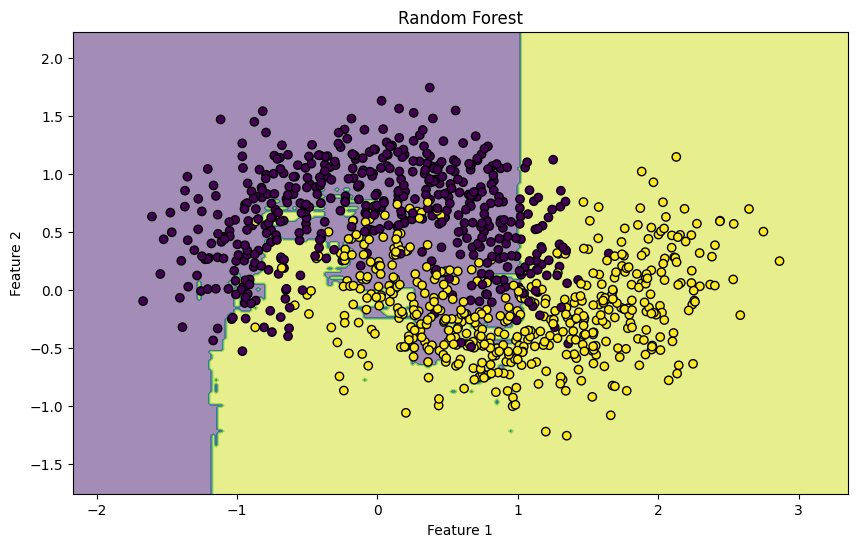

In [8]:
# 결과 시각화를 위한 플롯 설정
plt.figure(figsize=(10, 6))
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # x좌표 값들만 출력
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 # y좌표 값들만 출력

# 결정 경계를 그리기 위한 메쉬 그리드 생성
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # np.c_, np.r_ : 두 개의 array를 합치는 함수(c = column, r = row)
z = z.reshape(xx.shape)

# 원본 데이터 산포도 플롯
plt.contourf(xx, yy, z, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Random Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [9]:
from sklearn.datasets import load_breast_cancer, fetch_openml

breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

- 위스콘신 대학교 유방암 진단결과
- 데이터 개수 : 569개
- 변수 : 32개(ID, 진단결과 등)

In [10]:
breast_cancer.data.shape

(569, 30)

In [11]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target, columns=['diagnosis'])

In [12]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
y.head()

,diagnosis
0,0
1,0
2,0
3,0
4,0


- id : 환자 번호
- radius : 중심에서 외벽까지 거리들의 평균값
- texture : 질감 Gray-Scale값들의 표준편차
- area : 면적
- smoothness : 조그만 정도(둘레^2/면적 -1)
- concavity : 오목한 정도
- points : 오목한 점의 개수
- symetry : 대칭
- dimension : 프렉탈 차원
- mean : 평균값
- se : 표준오차
- worst : 세포 중 제일 큰 3개의 값의 평균값
- dianosis : 1 악성(유방암), 0 양성(단순낭종)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [15]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
y['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [18]:
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


In [19]:
import warnings
warnings.filterwarnings(action='ignore')

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

- 와인 데이터, 랜덤 포레스트로 예측

In [20]:
y_train_pred = rfc.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

y_test_pred = rfc.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print('Training Accuracy : {: .3f}'.format(train_acc))
print('Testing Accuracy : {: .3f}'.format(test_acc))

Training Accuracy :  0.995
Testing Accuracy :  0.965


In [21]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

X_wine = df.drop('quality', axis=1)
y_wine = df['quality']

df['quality'].value_counts()

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_wine_train = normalizer.fit_transform(X_wine_train)
X_wine_test = normalizer.transform(X_wine_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_wine_train, y_wine_train)

RandomForestClassifier(random_state=42)

In [22]:
# 평가
y_wine_train_pred = model.predict(X_wine_train)
y_wine_test_pred = model.predict(X_wine_test)

acc_wine_train = accuracy_score(y_wine_train, y_wine_train_pred)
acc_wine_test = accuracy_score(y_wine_test, y_wine_test_pred)

print('Training Accuracy : {: .3f}'.format(acc_wine_train))
print('Testing Accuracy : {: .3f}'.format(acc_wine_test))

Training Accuracy :  1.000
Testing Accuracy :  0.667


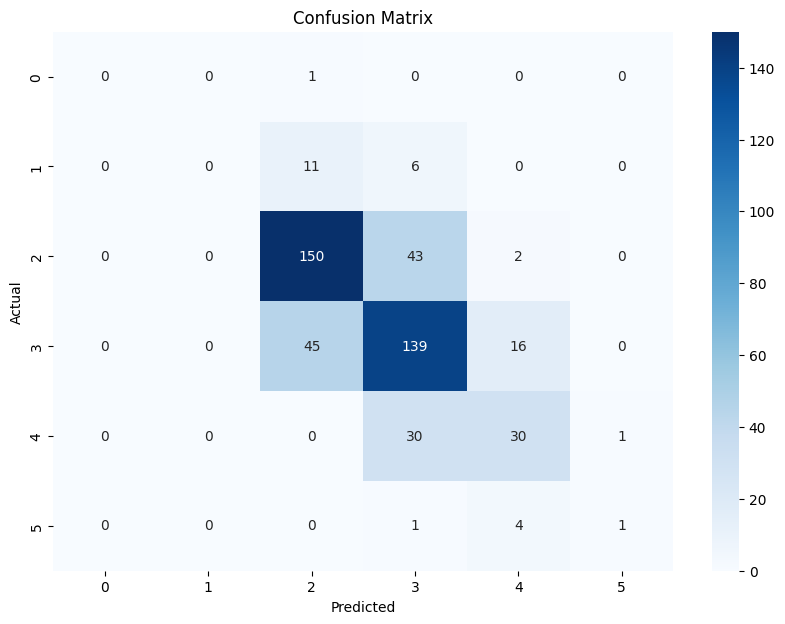

In [23]:
# 히트맵
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_wine_test, y_wine_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Grid Search 

In [24]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score

cv_scores = []
estimator_list = [i for i in range(0, 50)]
for i in tqdm(range(0, 50)): # tqdm : 로딩바 세팅
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1, random_state=42)
    score = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy').mean()
    cv_scores.append(score)

print(cv_scores)

100%|███████████████████████████████████████████| 50/50 [00:23<00:00,  2.12it/s]

[0.9296153846153846, 0.9272435897435898, 0.9422435897435898, 0.9421153846153846, 0.9446153846153846, 0.9471153846153847, 0.9521794871794871, 0.9521794871794873, 0.9446794871794871, 0.9421153846153846, 0.9471153846153847, 0.9496153846153847, 0.9421153846153846, 0.9496794871794872, 0.9471153846153847, 0.9496153846153847, 0.9471794871794872, 0.9471153846153847, 0.9471153846153847, 0.9496794871794872, 0.9471153846153847, 0.9446153846153846, 0.9496794871794872, 0.9446153846153846, 0.9496794871794872, 0.9446153846153846, 0.9496794871794872, 0.9496794871794872, 0.9496794871794872, 0.9446153846153846, 0.9471153846153847, 0.9446153846153846, 0.9496794871794872, 0.9471153846153847, 0.9471153846153847, 0.9496153846153847, 0.9496153846153847, 0.9521153846153846, 0.9496794871794872, 0.9496794871794872, 0.9521794871794871, 0.9496794871794872, 0.9521794871794871, 0.9496794871794872, 0.9496794871794872, 0.9496794871794872, 0.9521794871794871, 0.9546794871794871, 0.9546794871794871, 0.9496153846153845]

- n_jobs : 모델 학습 및 평가에서 병렬 처리를 위한 파라미터, 모델을 학습하거나 교차검증을 할 때 사용할 CPU의 코어수를 지정한다.
    - n_jobs = -1 : 사용 가능한 모든 CPU 코어를 사용하여 작업을 병렬처리한다.
    - n_jobs = 1 : 단일코어에서 작업을 처리한다.
    - n_jobs = k : k개의 CPU 코어에서 작업을 병렬 처리한다.

- cross_val_score : k-fold 교차 검증을 수행하고, 그 평균 정확도를 리스트에 저장한다.
- cv : 데이터셋을 여러 개의 작은 셋으로 나눠서 모델을 평가하는데, 데이터 셋을 k개의 폴드로 나누고 각각 한 번씩 테스트하여 k번 모델을 학습하고 평가한다.
    - cv = k : k번 작업을 처리한다.
    - cv = 5 : 기본값 5-fold 교차검증
    - cv = LeaveOneOut() : LOOCV 각 데이터 포인트를 한 번씩 테스트 세트로 사용하여 n번 모델을 학습하고 평가한다.(계산비용이 매우 높다.)
    - cv = ShuffleSplit(n_split=반복횟수, test_size=테스트셋 비율) : 데이터셋을 여러 번 랜덤하게 나누어 교차검증을 수헹한다.

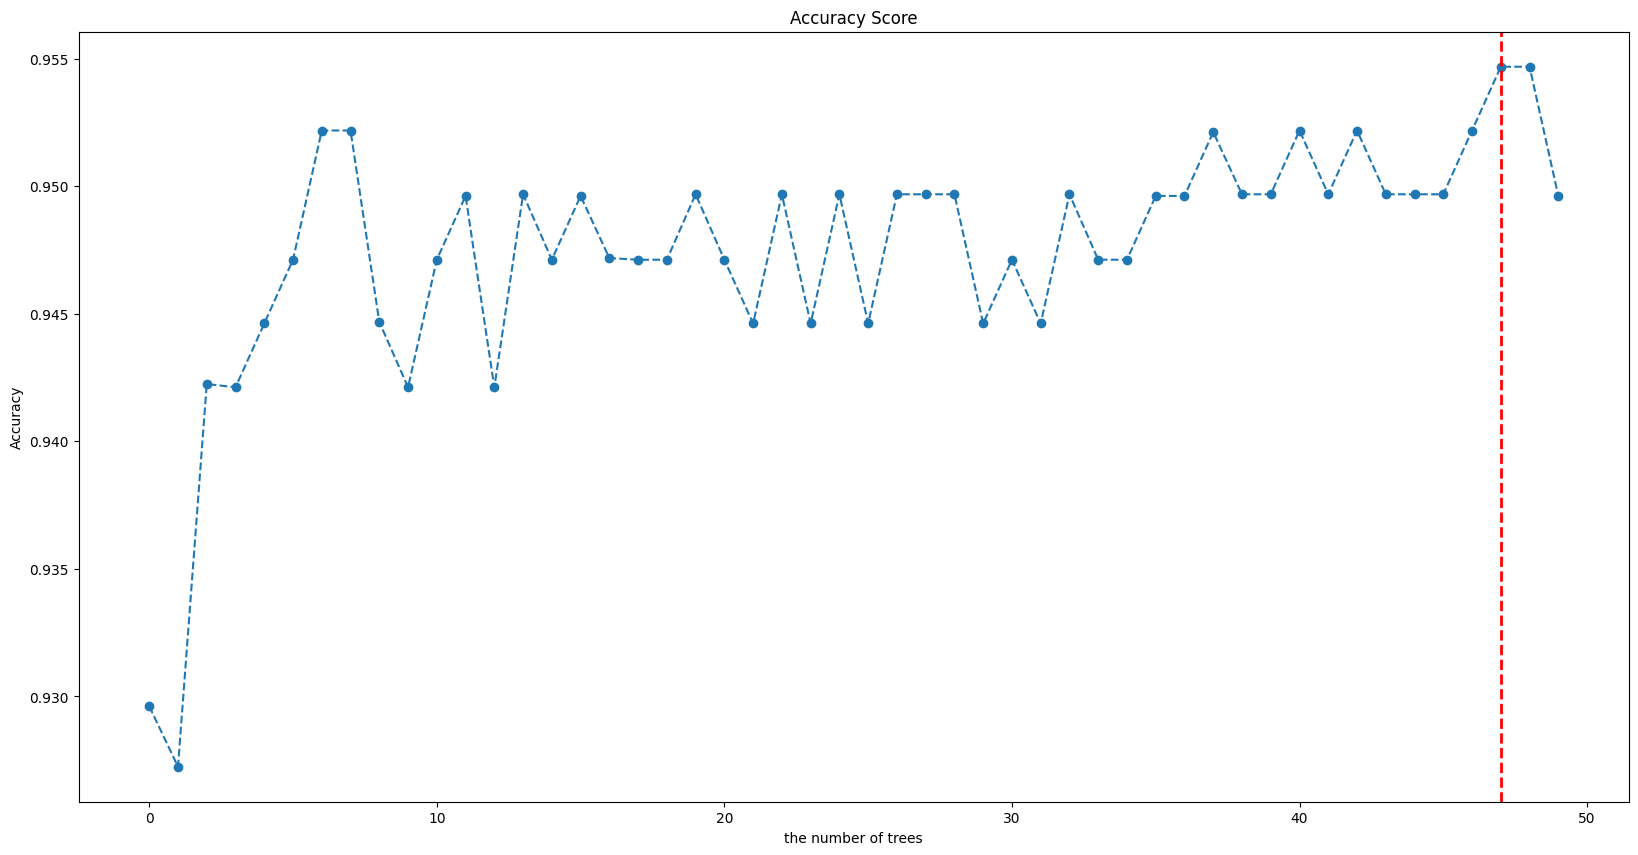

In [25]:
# 시각화
best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]

plt.figure(figsize=(20, 10))
plt.plot(estimator_list, cv_scores, marker='o', linestyle='dashed')
plt.xlabel('the number of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy Score')
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [26]:
print(f'최적의 tree 개수 : {(cv_scores.index(max(cv_scores)))+1}')

print(f'정확도 : {max(cv_scores):0.4f}')

최적의 tree 개수 : 48
정확도 : 0.9547


In [27]:
rfc = RandomForestClassifier(n_estimators=48, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

y_train_pred = rfc.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)

y_test_pred = rfc.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

print('Training Accuracy : {:0.3f}'.format(acc_train))
print('Testinb Accuracy : {:0.3f}'.format(acc_test))

Training Accuracy : 1.000
Testinb Accuracy : 0.971


# Random Forest의 하이퍼파라미터
- n_estimators : 결정트리의 개수를 지정(default = 10)
- min_sample_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수, (defult = 2) 과적합을 제어하는 데 사용된다.
- min_sample_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터 수(과적합을 제어하는데 사용된다.)
- max_features : 최적의 분할을 위해 고려할 최대 feature의 개수, (defult = auto) int로 개수를 지정을 하거나 float으로 비율을 지정할 수 있다.
- max_depth : 트리의 최대 깊이(default=None), 깊어질 수록 과적합 위험성이 있다.
- max_leaf_nodes : 리프노드의 최대 개수

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
import warnings
warnings.filterwarnings(action='ignore')

rfc = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators':[50, 60, 70],
    'max_depth':[10, 15, 20],
    'max_leaf_nodes':[50, 100, 200],
    'max_features':['auto', 'sqrt', 'log2'],
    'criterion':['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator = rfc, param_grid=param_grid, cv=10, verbose=1, n_jobs=8) # verbose : 출력
y_train = y_train.reshape(-1,)
CV_rfc.fit(X_train, y_train)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [30]:
CV_rfc.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [31]:
result_table = pd.DataFrame(CV_rfc.cv_results_)
result_table = result_table.sort_values(by='mean_test_score', ascending=False)
result_table[['params', 'mean_test_score']]

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [32]:
best_rfc = CV_rfc.best_estimator_
best_rfc.fit(X_train, y_train)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [33]:
X_train

array([[-0.12348985, -0.29680142, -0.17050713, ..., -0.84082156,
        -0.8563616 , -0.76574773],
       [-0.22826757, -0.65795149, -0.25377521, ..., -0.37706655,
        -1.3415819 , -0.41480748],
       [ 0.14553402, -1.23056444,  0.24583328, ..., -0.04762652,
        -0.08997059,  0.4882635 ],
       ...,
       [ 0.03226081, -0.55578404, -0.08064356, ..., -1.26179013,
        -0.6828391 , -1.27672587],
       [-0.05552593,  0.10949242, -0.04684166, ...,  1.07924018,
         0.4755842 ,  1.25530227],
       [-0.56525537,  0.32333128, -0.619825  , ..., -0.61952313,
        -0.30366032, -0.84348042]])

In [34]:
y_train_pred = best_rfc.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

y_test_pred = best_rfc.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print('Training Accuracy : {:.4f}'.format(train_acc))
print('Testing Accuracy : {:.4f}'.format(test_acc))

NameError: name 'best_rfc' is not defined

In [35]:
from sklearn.metrics import recall_score, precision_score

recall = recall_score(y_test, y_test_pred) # 민감도
precision = precision_score(y_test, y_test_pred) # 정밀도

print(f'정확도 : {test_acc:0.4f}, 민감도 : {recall:0.4f}, 정밀도 : {precision:0.4f}')

정확도 : 0.9649, 민감도 : 0.9907, 정밀도 : 0.9640


In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_rfc, X_test, y_test, cmap=plt.cm.Reds)
plt.show()

NameError: name 'best_rfc' is not defined

In [37]:
print(breast_cancer.feature_names, best_rfc.feature_importances_)

NameError: name 'best_rfc' is not defined

In [38]:
features = {}
for feature, importance in zip(breast_cancer.feature_names, best_rfc.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame.from_dict(features, orient='index').rename(columns={0:'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index':'Features'})

sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

NameError: name 'best_rfc' is not defined

In [39]:
# 다른 알고리즘과의 비교
# Decision Tree랑 Random Forest 정확도, 민감도, 정밀도 비교
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth' : [10, 15, 20],
    'max_leaf_nodes' : [50, 100, 200],
    'criterion' : ['gini', 'entropy']
}

CV_classifier = GridSearchCV(estimator=classifier, param_grid = param_grid, cv=10, verbose=1, n_jobs=-1)
CV_classifier.fit(X_train, y_train)

best_classifier = CV_classifier.best_estimator_
best_classifier.fit(X_train, y_train)

y_pred = best_classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'정확도 : {acc:0.4f}, 민감도 : {recall:0.4f}, 정밀도 : {precision:0.4f}')

Fitting 10 folds for each of 18 candidates, totalling 180 fits
정확도 : 0.9591, 민감도 : 0.9722, 정밀도 : 0.9633


In [40]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, p=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'정확도 : {acc:0.4f}, 민감도 : {recall:0.4f}, 정밀도 : {precision:0.4f}')

AttributeError: 'NoneType' object has no attribute 'split'

- Random Forest => 정확도 : 0.9649, 민감도 : 0.9815, 정밀도 : 0.9636
- Decison Tree => 정확도 : 0.9591, 민감도 : 0.9722, 정밀도 : 0.9633
- KNN => 정확도 : 0.9591, 민감도 : 0.9722, 정밀도 : 0.9633

Random Forest가 가장 우수한 성능을 띈다고 말해줄 수 있다.

In [162]:
import warnings
warnings.filterwarnings(action='ignore')

In [163]:
from sklearn.tree import plot_tree

In [167]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(name='boston', version=1, as_frame=True)

In [168]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [169]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [170]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [182]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)

In [183]:
param_grid = {
    'max_depth' : [10, 50, 100, 200], # 트리의 최대 깊이 제한
    'max_leaf_nodes' : [50, 100, 200], # 트리의 최대 리프 노드 수를 제한
    'criterion' : ['squared_error'] # 분할 기준을 정의('squared_error : 평균 제곱 오차'를 최소화하는 방향으로)
}

In [184]:
from sklearn.model_selection import GridSearchCV

# estimator : 학습할 모델, param_grid : 탐색할 하이퍼파라미터 후보
# cv : 10-Fold(교차검증 사용)
# verbose = 1 : 학습과정에서 중간결과를 출력한다.(결과 맨 위에 뜬 문장 참고)
# n_jobs : 코어
# scoring : r2 스코어를 모델 평가 지표로 사용한다.
# error_score : 오류가 발생할 경우 예외처리하겠다.
CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=10, verbose=1, n_jobs=12, scoring='r2', error_score='raise')
CV_rfr.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, error_score='raise',
             estimator=RandomForestRegressor(random_state=42), n_jobs=12,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [10, 50, 100, 200],
                         'max_leaf_nodes': [50, 100, 200]},
             scoring='r2', verbose=1)

In [185]:
best_rfr = CV_rfr.best_estimator_
best_rfr # 최적의 하이퍼파라미터 추출(200, 42)

RandomForestRegressor(max_depth=50, max_leaf_nodes=200, random_state=42)

In [186]:
best_rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, max_leaf_nodes=200, random_state=42)

In [187]:
y_pred = best_rfr.predict(X_test) # 예측

In [192]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_score = r2_score(y_test, y_pred) # 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Random Forest Regressor')
print(f'R2 Score : {r2_score:0.4f}, MSE : {mse:0.4f}, MAE : {mae:0.4f}')

Random Forest Regressor
R2 Score : 0.8602, MSE : 10.5817, MAE : 2.2165


In [206]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
param_grid={
    'max_depth' : [10, 50, 100, 200], # 트리의 최대 깊이 제한
    'max_leaf_nodes' : [50, 100, 200], # 트리의 최대 리프 노드 수를 제한
    'criterion' : ['squared_error', 'absolute_error'] # 분할 기준을 정의('squared_error : 평균 제곱 오차'를 최소화하는 방향으로)
}

In [211]:
from sklearn.model_selection import GridSearchCV
CV_dtr = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=10, verbose=1, n_jobs=12, scoring='r2')
CV_dtr.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42), n_jobs=12,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [10, 50, 100, 200],
                         'max_leaf_nodes': [50, 100, 200]},
             scoring='r2', verbose=1)

In [212]:
best_dtr = CV_dtr.best_estimator_
best_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=50, random_state=42)

In [213]:
y_pred = best_dtr.predict(X_test)

In [215]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_score = r2_score(y_test, y_pred) # 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('DicisionTree Regressor')
print(f'R2 Score : {r2_score:0.4f}, MSE : {mse:0.4f}, MAE : {mae:0.4f}')

DicisionTree Regressor
R2 Score : 0.7865, MSE : 16.1573, MAE : 2.7462
